# 이동평균선 구하기
- 본 모듈은 다양한 웹 싸이트 (Naver / KRX)에서 주가 정보를 스크래핑(scraping) 
- https://github.com/sharebook-kr/pykrx

In [7]:
!pip install pykrx

     |████████████████████████████████| 92 kB 396 kB/s 
     |████████████████████████████████| 51 kB 438 kB/s 
     |████████████████████████████████| 251 kB 30.3 MB/s 


In [8]:
from pykrx import stock #from pykrx import bond
mydict={}
for ticker in stock.get_market_ticker_list():
  mydict.update({stock.get_market_ticker_name(ticker) : ticker})

In [9]:
search_key = "삼성"
values = [(key, value) for key, value in mydict.items() if search_key in key]
values

[('삼성SDI', '006400'),
 ('삼성SDI우', '006405'),
 ('삼성공조', '006660'),
 ('삼성물산', '028260'),
 ('삼성물산우B', '02826K'),
 ('삼성바이오로직스', '207940'),
 ('삼성생명', '032830'),
 ('삼성에스디에스', '018260'),
 ('삼성엔지니어링', '028050'),
 ('삼성전기', '009150'),
 ('삼성전기우', '009155'),
 ('삼성전자', '005930'),
 ('삼성전자우', '005935'),
 ('삼성제약', '001360'),
 ('삼성중공업', '010140'),
 ('삼성중공우', '010145'),
 ('삼성증권', '016360'),
 ('삼성출판사', '068290'),
 ('삼성카드', '029780'),
 ('삼성화재', '000810'),
 ('삼성화재우', '000815')]

In [10]:
start_date = '20210101'
end_date = '20220319'
df = stock.get_market_ohlcv(start_date, end_date, "005930")
df

,시가,고가,저가,종가,거래량
날짜,,,,,
2021-01-04,81000,84400,80200,83000,38655276
2021-01-05,81600,83900,81600,83900,35335669
2021-01-06,83300,84500,82100,82200,42089013
2021-01-07,82800,84200,82700,82900,32644642
2021-01-08,83300,90000,83000,88800,59013307
...,...,...,...,...,...
2022-03-14,70000,70200,69600,70200,9040993
2022-03-15,69800,70100,69500,69500,10258562
2022-03-16,70200,70500,69700,70400,10175750


In [11]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [12]:
df['5ma'] = df['종가'].rolling(window=5).mean()
df['20ma'] = df['종가'].rolling(window=20).mean()
df['60ma'] = df['종가'].rolling(window=60).mean()
df['120ma'] = df['종가'].rolling(window=120).mean()

In [13]:
df.columns

Index(['시가', '고가', '저가', '종가', '거래량', '5ma', '20ma', '60ma', '120ma'], dtype='object')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


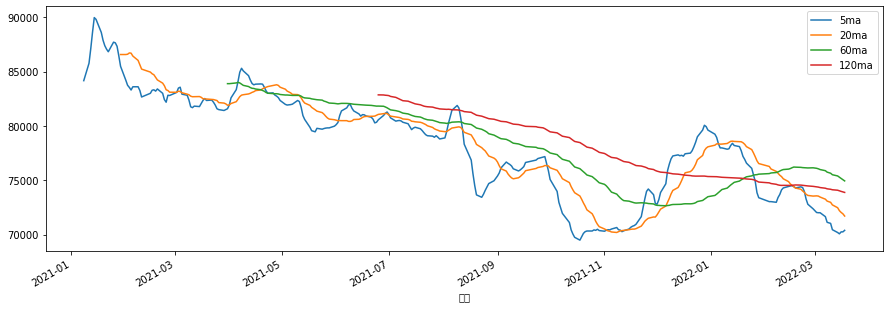

In [14]:
import matplotlib.pyplot as plt
df[['5ma', '20ma', '60ma', '120ma']].plot(figsize=(15, 5))

# 순서가 있는 데이터 변환하기

<img src='https://i.ytimg.com/vi/GTeK8Zn04pA/maxresdefault.jpg' width=600 height=400>

In [ ]:
# transform univariate time series to supervised learning problem
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
# define univariate time series
series = array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(series.shape)
# transform to a supervised learning problem
X, y = split_sequence(series, 3)
print(X.shape, y.shape)
# show each sample
for i in range(len(X)):
	print(X[i], y[i])

(10,)
(7, 3) (7,)
[1 2 3] 4
[2 3 4] 5
[3 4 5] 6
[4 5 6] 7
[5 6 7] 8
[6 7 8] 9
[7 8 9] 10


In [ ]:
code = [1,1,1,1,3,5,5,3,1,5,5,3,5,5,3,1,1,1,5,5,3,1,5,5,5,5,5,3,1,5,5,5,5,5,3,1,5,5,5,6,5,1,5,1,5,3,2,1]
X, y = split_sequence(code, 6)
data = pd.DataFrame(X)
data['target'] = y
data

,0,1,2,3,4,5,target
0,1,1,1,1,3,5,5
1,1,1,1,3,5,5,3
2,1,1,3,5,5,3,1
3,1,3,5,5,3,1,5
4,3,5,5,3,1,5,5
5,5,5,3,1,5,5,3
6,5,3,1,5,5,3,5
7,3,1,5,5,3,5,5
8,1,5,5,3,5,5,3
9,5,5,3,5,5,3,1
